In [3]:
import networkx as nx
from dk_rewiring import DkRewire
import matplotlib.pyplot as plt
from distribution_analysis import graph_distributions
import numpy as np

In [8]:
def full_test(test=None):
    if test is None:
        test = ['undirected','directed','disconnected','empty','complete','verbose','copy','full']
    for t in test:
        if t == 'undirected':
            # Generate GNP graph
            G = nx.gnp_random_graph(10,.5)
            
            # Rewire for each distribution type
            obj = DkRewire()
            zero_G = obj.step_rewire(G,d=0)
            one_G = obj.step_rewire(G,d=1)
#             two_G = obj.step_rewire(G,d=2)
#             two_one_G = obj.step_rewire(G,d=2.1)
#             two_five_G = obj.step_rewire(G,d=2.5)
            # Plot the rewirings
            fig = plt.figure(figsize=(10,10))
            plt.subplot(321)
            nx.draw(G,with_labels=True)
            plt.subplot(322)
            nx.draw(zero_G,with_labels=True)
            plt.subplot(323)
            nx.draw(one_G,with_labels=True)
            plt.subplot(324)
#             nx.draw(two_G,with_labels=True)
#             plt.subplot(325)
#             nx.draw(two_one_G,with_labels=True)
#             plt.subplot(326)
#             nx.draw(two_five_G,with_labels=True)
            plt.title('Undirected Test')
            plt.show()
        
        elif t == 'directed':
            try:
                # Generate directed GNP
                G = nx.fast_gnp_random_graph(100,.3,directed=True)
                
                # Force directed error
                obj = DkRewire()
                new_G = obj.step_rewire(G,d=0)
            except ValueError as e:
                # Catch directed error
                print(e)
                G = nx.gnp_random_graph(100,.3)
                G = nx.to_directed(G)
                
                # Force rewiring
                obj = DkRewire()
                zero_G = obj.step_rewire(G,d=0,directed=True)
                one_G = obj.step_rewire(G,d=1,directed=True)
                two_G = obj.step_rewire(G,d=2,directed=True)
                two_one_G = obj.step_rewire(G,d=2.1,directed=True)
                two_five_G = obj.step_rewire(G,d=2.5,directed=True)
        
        elif t == 'disconnected':
            try:
                # Create disconnected graph
                G = nx.Graph()
                G.add_edges_from([[0,1],[1,2],[2,0],[3,4],[4,5],[5,3]])
                # Force disconnected error
                obj = DkRewire()
                new_G = obj.step_rewire(G,d=0)
            except ValueError as e:
                print(e)
        
        elif t == 'empty':
            try:
                # Generate empty graph
                G = nx.Graph()
                obj = DkRewire()
                new_G = obj.step_rewire(d=0)
            except ValueError as e:
                print(e)
        
        elif t == 'complete':
            try:
                # Generate complete graph
                G = nx.complete_graph(100)
                obj = DkRewire()
                new_G = obj.step_rewire(d=0)
            except ValueError as e:
                print(e)
        
        elif t == 'verbose':
            # Check verbose argument
            G = nx.gnp_random_graph(100,.3)
            obj = DkRewire()
            new_G, removed_edges, added_edges = obj.step_rewire(d=0)
            print(removed_edges, added_edges)
        
        elif t == 'copy':
            # Check copy argument
            G = nx.gnp_random_graph(100,.3)
            obj = DkRewire()
            new_G = obj.step_rewire(d=0,copy_graph=True)
            
            # Plot networks
            plt.subplot(121)
            nx.draw(G,with_labels=True)
            plt.subplot(122)
            nx.draw(new_G,with_labels=True)
            plt.show()
        
        else:
            # Check full rewire
            # Generate GNP graph
            G = nx.gnp_random_graph(100,.3)
            
            # Rewire for each distribution type
            obj = DkRewire()
#             zero_G = obj.full_rewire(G,d=0)
#             one_G = obj.full_rewire(G,d=1)
# #             two_G = obj.full_rewire(G,d=2)
# #             two_one_G = obj.full_rewire(G,d=2.1)
# #             two_five_G = obj.full_rewire(G,d=2.5)
            
#             # Plot the rewirings
#             plt.subplot(321)
#             nx.draw(G,with_labels=True)
#             plt.subplot(322)
#             nx.draw(zero_G,with_labels=True)
#             plt.subplot(323)
#             nx.draw(one_G,with_labels=True)
#             plt.subplot(324)
# #             nx.draw(two_G,with_labels=True)
# #             plt.subplot(325)
# #             nx.draw(two_one_G,with_labels=True)
# #             plt.subplot(326)
# #             nx.draw(two_five_G,with_labels=True)
#             plt.title('Full Rewire')
#             plt.show()
            
            
            

In [5]:
def check_0_swap(G):
    obj = DkRewire()
    new_G = obj.step_rewire(G,0)
    m_g = len(G.edges())
    n_g = len(G.nodes())
    m_new_g = len(new_G.edges())
    n_new_g = len(new_G.nodes())
    print(f"G: {2*m_g/n_g}")
    print(f"New G: {2*m_new_g/n_new_g}")

In [6]:
def check_1_swap(G):
    obj = DkRewire()
    new_G = obj.step_rewire(G,1)
    deg_dist = graph_distributions(G,avg_nn_dist=False,dd_clustering=False)
    new_deg_dist = graph_distributions(G,avg_nn_dist=False,dd_clustering=False)
    return np.allclose(deg_dist[0][0],new_deg_dist[0][0]), np.allclose(deg_dist[0][1],new_deg_dist[0][1]), np.allclose(deg_dist[1][0],new_deg_dist[1][0]), np.allclose(deg_dist[1][1],new_deg_dist[1][1])

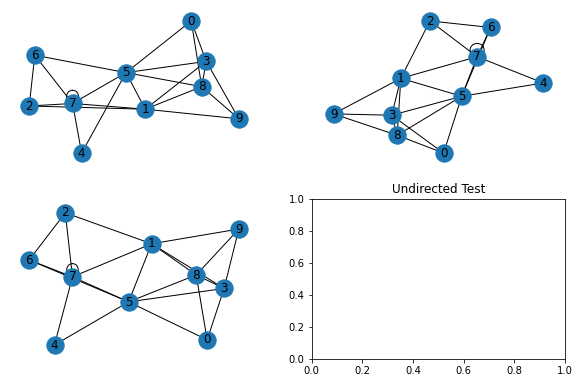

This algorithm is designed for undirected graphs. If you wish to run anyway as an undirected graph, set directed=True
True
True


NetworkXError: Frozen graph can't be modified

In [9]:
full_test()

In [ ]:
check_0_swap(nx.gnp_random_graph(100,.3))

In [ ]:
check_1_swap(nx.barabasi_albert_graph(1000,3))